<a href="https://colab.research.google.com/github/DanielVillarino/AA_PRACTICA1_GRUPO_1.ipynb/blob/main/AA_PRACTICA1_GRUPO_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   Grupo 1
*   Daniel Villarino Agueda
*   Pablo Martín Heras
# <center>**Práctica 1:**
# <center>**Diseño, Entrenamiento y Test de un Sistema de Redes de Neuronas Artificiales.**


## **1. Introducción**
En esta práctica crearemos un modelo de Red de Neuronas Artificiales que sea capaz de reconocer y clasificar imágenes de ropa según sus diferentes tipologías. Este modelo será definido, configurado, entrenado, evaluado y mejorado para posteriormente usarlo para hacer predicciones. Para ello haremos uso de la función Fashion-MNIST, un conjunto de datos precargado en Keras que contiene las imágenes de los artículos de Zalando, una tienda de moda online alemana especializada en ventas de ropa y zapatos.


## **2. Desarrollo**
Para comenazar, importamos las librerías que vamos a utilizar en el desarrollo de la práctica, y nos aseguramos de que la versión de TensorFlow que se está ejecutando sea igual a 2.0.0 o mayor. 

In [1]:
# IMPORTAMOS KERAS
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
# Representamos la versión de keras
print(tf.keras.__version__)
# Representamos la GPU disponible
print("GPU Available:", tf.config.list_physical_devices('GPU'))
# Representamos la versión del tensorflow
print(tf.__version__)

# Importamos librerías que requeriremos mas adelante
from keras import models
from keras import layers

# Librerías de ayuda
import numpy as np
import matplotlib.pyplot as plt


2.6.0
GPU Available: []
2.6.0


Como podemos observar la versión de TensorFlow y keras es la 2.6.0, por lo que podemos seguir con el desarrollo de la práctica.

Cargamos el conjunto de datos Fashion-MNIST en Keras.


*   *`train_images`* y *`train_labels`* son el conjunto de datos que el modelo usa para aprender.
*   *`test_images`* y *`test_labels`* son el conjunto de datos con los que probaremos al modelo ya entrenado.

In [2]:
# CARGAMOS EL CONJUNTO DE DATOS FASHION_MINIST EN KERAS
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


Incluimos los nombres de los artículos en un vector de 10 dimensiones, los cuales van asignados cada uno a una imagen del conjunto de datos. 

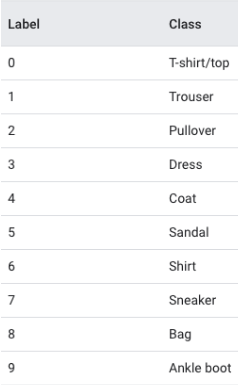

In [3]:
class_names = ['Camiseta/top', 'Pantalón', 'Sudadera', 'Vestido', 'Abrigo',
               'Sandalia', 'Camisa', 'Zapatilla', 'Mochila', 'Bota alta']

###**2.1 Análisis de los datos**
Comenzamos echando un vistazo a los datos de entrenamiento:

In [4]:
print(train_images.shape)

(60000, 28, 28)


Podemos observar que contiene 60.000 imágenes de 28x28 píxeles


In [5]:
len(train_labels)

60000

Cada imagen es un número entero del 0 al 9

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

A continuación veremos la imagen de las botas altas, por lo que excogeremos la posición 0 siguiendo el array mostrado anteriormente

In [7]:
# Como ya sabemos, las botas altas corresponden con el número 9.
train_labels[0]

9

Dibujamos su matriz 

In [8]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

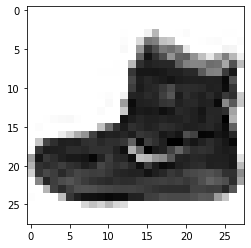

In [9]:
# Veamos el elemento 0 y pintémoslo con matplotlib
import matplotlib.pyplot as plt
digit = train_images[0]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

Comprobamos los datos de prueba:


In [10]:
test_images.shape

(10000, 28, 28)

En este caso tenemos un conjunto de 10.000 imágenes de 28x28 píxeles

In [11]:
len(test_labels)

10000

In [12]:
test_labels.shape, test_labels

((10000,), array([9, 2, 1, ..., 8, 1, 5], dtype=uint8))

###**2.2 Pre procesado de los datos**
Antes del entrenamiento, **preprocesaremos nuestros datos** dándoles la forma que espera la red y escalando para que todos los valores estén en el intervalo `[0, 1]`. Si inspeccionamos la primera imagen en el set de entrenamiento, encontramos que los valores de los pixeles estan entre 0 y 255:

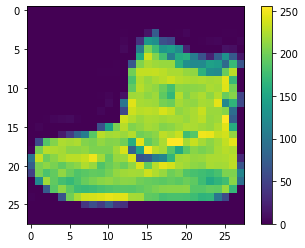

In [13]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Antes de alimentar al modelo de la red neuronal, lo transformaremos en una matriz de forma `float32` con forma `(60000, 28 * 28)` con valores entre 0 y 1.

In [14]:
train_images = train_images / 255.0

test_images = test_images / 255.0

###**2.3 Construcción de la RNA**.

####**Caso 1**

**Construir el modelo**
 
Lo primero de todo que vamos a llevar a cabo es construir la red neuronal que nos
permitirá configurar las capas del modelo y obtener los resultados organizados en la
web de Zalando.

**Configurar las capas**

En este paso, procedemos a crear los bloques de construcción básicos de una red
neuronal, como las capas o layers. El principal objetivo será unir capas sencillas con
unos parámetros ya establecidos (10).
La primera capa que encontramos es la capa Flatten, que nos permite transformar el
formato de las imágenes de un arreglo bi-dimensional (28x28) a unidimensional (784
pixeles). Esta capa no tiene unos parámetros establecidos previamente, únicamente
reformatea el set de datos.
Lo siguiente que encontramos dos capas Dense, completamente conectadas, que nos
permiten tener los píxeles de las imágenes “concentrados”. La primera de las 2 capas
contiene 128 nodos y la segunda 10 nodos de tipo softmax que nos devuelve un
arreglo de 10 probabilidades que suman, en total, 1.

In [15]:
# Añadimos una primera capa .Flatten que convierte el arreglo en un arreglo unidimensional,
# ademas de dos capas .Dense densamente conectadas que contienen sus nodos correspondientes.
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


**Compilar el modelo**

Antes de conseguir ejecutar y compilar el modelo, es necesario agregar las
configuraciones que aparecen en este sector del código:
- Loss function: su objetivo es medir la exactitud del modelo y orientar en la
dirección adecuada al modelo.
- Optimizer: el optimizador del modelo, que se irá actualizando a medida que
cambiemos el set de datos.
- Metrics: monitorea los pasos de entrenamiento del modelo.

In [16]:
# Añadimos la función de pérdida y el optimizador
model1.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Entrenar el modelo**

El entrenamiento será el paso del proceso que nos ayudará a orientarnos y entender
si realmente lo que estamos llevando a cabo tiene buena pinta. Mediante el
entrenamiento el modelo aprende a asociar imágenes y etiquetas gracias a los arreglos
train_images y train_labels. Para comenzar el entrenamiento, utilizamos el método
model.fit, que nos ayuda a ajustar el modelo a el set de datos de entrenamiento.

In [17]:
# Comenzamos con el entrenamiento del modelo
model1.fit(train_images, train_labels, epochs=5, batch_size=128)
# Vemos que nuestro modelo tiene una función de pérdida muy elevada (0.5981) y una 
# precisión no muy alta(0.7963), por lo que no es muy modelo muy fiable.

Epoch 1/5
469/469 [==============================] - 2s 2ms/step - loss: 1.5500 - accuracy: 0.5357
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.8830 - accuracy: 0.7307
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.7084 - accuracy: 0.7631
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.6391 - accuracy: 0.7821
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5981 - accuracy: 0.7963


**Evaluar la exactitud**

Las funciones test_loss y test_acc nos ayudarán a certificar la exactitud del 
modelo, con lo que podremos diferenciar si se ha producido un sobre entrenamiento. El sobre entrenamiento se produce cuando un modelo de aprendizaje de maquina tiene un rendimiento peor sobre un set de datos nuevo que nunca antes ha visto comparado con el de entrenamiento.

In [18]:
# Comparamos el rendimiento del modelo con el conjunto de imágenes
test_loss, test_acc = model1.evaluate(test_images,  test_labels, verbose=2)
# Vemos que la pérdida y la precisión de las imágenes de prueba son muy semejantes 
# a las conseguidas durante el entrenamiento, por lo que en este caso no se produce 
#un sobre entrenamiento.

313/313 - 0s - loss: 0.6099 - accuracy: 0.7851


In [19]:
# Precisión del test
print('\nTest accuracy:', test_acc)


Test accuracy: 0.785099983215332


**Predicciones**

Tras haber realizado el entrenamiento del modelo, procedemos a realizar predicciones
sobre las imágenes presentes en el modelo. Una prediccion es un arreglo de 10 numeros.
Estos representan el nivel de &quot;confianza&quot; del modelo sobre las imagenes de cada uno de los 10
articulos de moda/ropa.

In [20]:
predictions = model1.predict(test_images)
predictions[5]

array([7.19068339e-04, 9.78089154e-01, 4.04726947e-04, 4.94523812e-03,
       1.07070133e-02, 3.18034523e-07, 5.13097458e-03, 1.33331115e-08,
       3.47364039e-06, 5.53557804e-08], dtype=float32)

In [21]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Dibujamos la predicción de la 6º figura. 

Podemos observar la probabilidad de que sea dicha imagen y un gráfica que nos devuelve la probabilidad que tiene cada imagen de ser la figara 6.

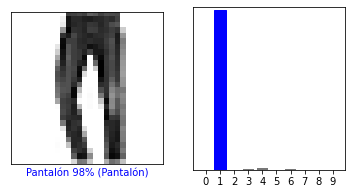

In [22]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Ahora dibujaremos la predicción de 10 imágenes. 

Al igual que en el caso anterior, nos devuelve la imagen, la probabilidad de de que sea dicha imagen y la probabilidad que tienen las demas imágenes de ser la figura 6.

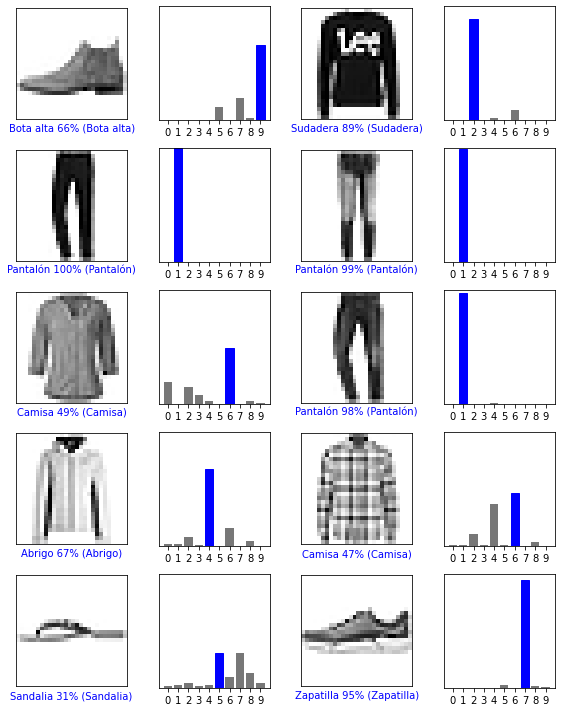

In [23]:
num_rows = 5
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

####**Caso 2**

In [24]:
# Añadimos una primera capa .Flatten que convierte el arreglo en un arreglo unidimensional,
# ademas de dos capas .Dense densamente conectadas que contienen sus nodos correspondientes.
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [25]:
# Añadimos la función de pérdida y el optimizador
model2.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
# Comenzamos con el entrenamiento del modelo
model2.fit(train_images, train_labels, epochs=5, batch_size=128)
# Vemos que nuestro modelo tiene una función de pérdida alta (0.4235) y una precisión
# adecuada (0.8531). Si lo comparamos con el modelo anterior, vemos que nuestro 
# modelo de entrenamiento ha mejorado notablemente.

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.9950 - accuracy: 0.6654
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5190 - accuracy: 0.8257
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4629 - accuracy: 0.8420
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4375 - accuracy: 0.8496
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4235 - accuracy: 0.8531


In [27]:
# Comparamos el rendimiento del modelo con el conjunto de imágenes
test_loss, test_acc = model2.evaluate(test_images,  test_labels, verbose=2)
# Si lo comparamos con el modelo de entrenamiento, vemos que la función de pérdida
# es más alta y la precisión más baja, pero son valores muy semejantes, por lo
# que no se podría decir que se ha producido sobre entrenamiento.

313/313 - 0s - loss: 0.4655 - accuracy: 0.8405


In [28]:
# Precisión del test
print('\nTest accuracy:', test_acc)


Test accuracy: 0.840499997138977


Realizamos la predicción

In [29]:
predictions = model2.predict(test_images)
predictions[5]

array([2.1717993e-03, 9.9610990e-01, 5.8222715e-05, 1.0893837e-03,
       5.3476874e-04, 1.2848230e-11, 3.5940306e-05, 7.4119584e-15,
       2.7416840e-08, 5.6290823e-11], dtype=float32)

Dibujamos la predicción de la 6º figura

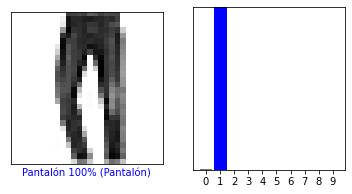

In [30]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Ahora dibujaremos la predicción de 10 imágenes

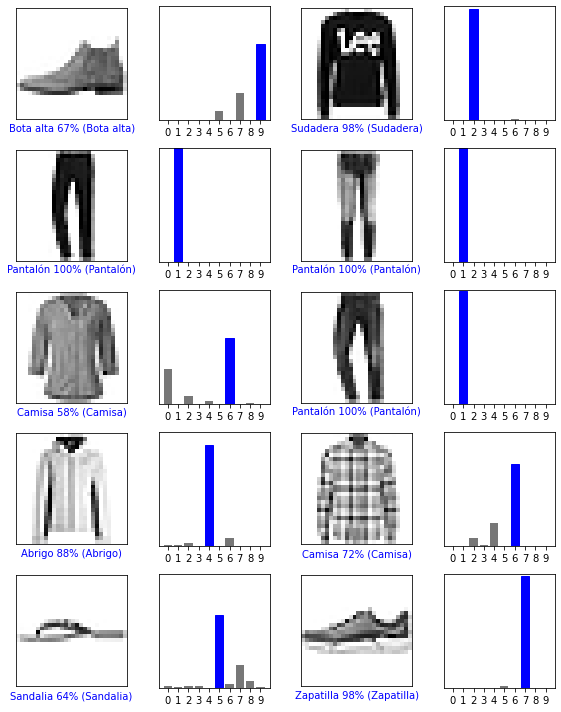

In [31]:
num_rows = 5
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

**Análisis con 25 épocas de entrenamiento**



In [32]:
# Añadimos una primera capa .Flatten que convierte el arreglo en un arreglo unidimensional,
# ademas de dos capas .Dense densamente conectadas que contienen sus nodos correspondientes.
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
# Añadimos la función de pérdida y el optimizador
model2.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Comenzamos con el entrenamiento del modelo
model2.fit(train_images, train_labels, epochs=25, batch_size=128)
# Vemos que nuestro modelo tiene una función de pérdida alta (0.3671) y una precisión
# no muy alta (0.8720). 

Epoch 1/25
469/469 [==============================] - 2s 3ms/step - loss: 0.8152 - accuracy: 0.7477
Epoch 2/25
469/469 [==============================] - 1s 2ms/step - loss: 0.5220 - accuracy: 0.8247
Epoch 3/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4743 - accuracy: 0.8385
Epoch 4/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4511 - accuracy: 0.8444
Epoch 5/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4351 - accuracy: 0.8490
Epoch 6/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4245 - accuracy: 0.8539
Epoch 7/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4167 - accuracy: 0.8551
Epoch 8/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4098 - accuracy: 0.8555
Epoch 9/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4048 - accuracy: 0.8581
Epoch 10/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4012 - accuracy: 0.8596

In [33]:
# Comparamos el rendimiento del modelo con el conjunto de imágenes
test_loss, test_acc = model2.evaluate(test_images,  test_labels, verbose=2)

313/313 - 0s - loss: 0.4315 - accuracy: 0.8535


Como podemos observar, al introducir más épocas la función de pérdida y la precisión son mejores en el modelo de prueba. Además, los valores al testear el modelo son bastante semejantes, apreciándose una leve mejora en la función de pérdida y un leve empeoramiento en la precisión.

Esto nos indica que, a pesar de haber introducido más épocas y producirse un sobre entrenamiento, en realidad el modelo ha mejorado levemente.

####**Caso 3**

In [34]:
# Añadimos una primera capa .Flatten que convierte el arreglo en un arreglo unidimensional,
# ademas de dos capas .Dense densamente conectadas que contienen sus nodos correspondientes.
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])

In [35]:
# Añadimos la función de pérdida y el optimizador
model3.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [36]:
# Comenzamos con el entrenamiento del modelo
model3.fit(train_images, train_labels, epochs=5, batch_size=128)
# Vemos una función de pérdida excesivamente elevada (1.3240) y una precisión muy
# baja (0.6454), por lo que nuestro modelo no es muy fiable.

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 2.0788 - accuracy: 0.3192
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 1.8044 - accuracy: 0.4787
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 1.6056 - accuracy: 0.5980
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 1.4489 - accuracy: 0.6334
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 1.3240 - accuracy: 0.6454


In [37]:
# Comparamos el rendimiento del modelo con el conjunto de imágenes
test_loss, test_acc = model3.evaluate(test_images,  test_labels, verbose=2)
# Si lo comparamos con el modelo de entrenamiento, la función de pérdida y la precisión
# son muy parecidas, por lo que no se produce sobre entrenamiento.

313/313 - 0s - loss: 1.2764 - accuracy: 0.6388


In [38]:
# Precisión del test
print('\nTest accuracy:', test_acc)


Test accuracy: 0.6388000249862671


Realizamos la predicción

In [39]:
predictions = model3.predict(test_images)
predictions[5]

array([0.09696634, 0.39351785, 0.05427866, 0.17636237, 0.05077485,
       0.04244516, 0.09310947, 0.03579412, 0.01941137, 0.03733972],
      dtype=float32)

Dibujamos la predicción de la 6º figura

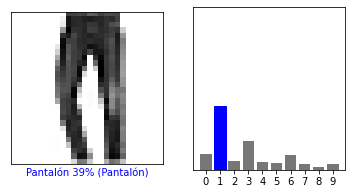

In [40]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Ahora dibujaremos la predicción de 10 imágenes

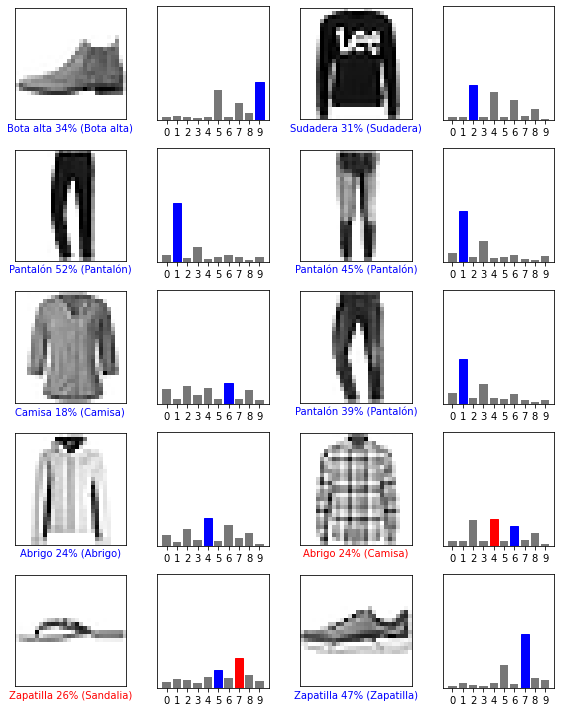

In [41]:
num_rows = 5
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

**MEJORA USANDO EL OPTIMIZADOR ADAM**

**OPTIMIZADOR ADAM**

El optimizador es la parte del modelo encargado de generar pesos cada vez mejores, juega un papel fundamental en todo el proceso. Aquí es donde entra el optimizador Adam, el cual es una combinación de otros dos optimizadores: AdaGrad y RMSprop.

 AdaGrad mantiene un  factor específico para todos los pesos del modelo en vez de establecer un valor uniforme para todos los pesos, creando una variación muy interesante en los que conocemos como el factor de entrenamiento.
El RMSprop es muy similar al AdaGrad, salvo que el factor de entrenamiento se realiza dividiéndolo por la media del declive exponencial del cuadrado de los gradientes (conocido como glup).

Tras saber como funcionan ambos algoritmos, observamos que Adam mantiene un factor de entrenamiento por parámetro y cada factor de entrenamiento se ve afectado por la media del momentum del gradiente, además de calcular el RMSprop.

**FUNCIÓN DE PÉRDIDA SPARSE_CATEGORICAL_CROSSENTROPY**

 Para entender cómo funciona el sparse categorical crossentropy, primero debemos entender que aporta la función de pérdida a un modelo. La función de pérdida nos ofrece una forma de calcular la “pérdida de calidad" que sufre un aspecto con respecto al objetivo de calidad que nos hayamos marcado en el modelo.
 
 A diferencia del categorical crossentropy, que produce un único vector con las posibles relaciones de cada categoría, el sparse categorical crossentropy muestra una nueva categoría en la cual mostrará el producto con un índice menor, o lo que es lo mismo, el producto con más probabilidades de aparecer, ofreciendo la opción de mayor calidad presente entre todas las opciones.


In [42]:
# Añadimos una primera capa .Flatten que convierte el arreglo en un arreglo unidimensional,
# ademas de dos capas .Dense densamente conectadas que contienen sus nodos correspondientes.
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])
# Añadimos la función de pérdida y el optimizador
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Comenzamos con el entrenamiento del modelo
model3.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 1.4921 - accuracy: 0.5687
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.9160 - accuracy: 0.7579
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.7080 - accuracy: 0.7997
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.6095 - accuracy: 0.8188
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5501 - accuracy: 0.8292


In [43]:
# Comparamos el rendimiento del modelo con el conjunto de imágenes
test_loss, test_acc = model3.evaluate(test_images,  test_labels, verbose=2)
# Si lo comparamos con el modelo de entrenamiento, la función de pérdida y la precisión
# son muy parecidas, por lo que no se produce sobre entrenamiento.

313/313 - 0s - loss: 0.5523 - accuracy: 0.8226


Al introducir el optimizador 'adam' vemos que nuestro modelo mejora notáblemente, pasando de una función de pérdida de 1.3240 a una de 0.5501, además de que la precisión mejora notablemente, pasando de 0.6454 a 0.8292.

####**Caso 4**

In [44]:
# Añadimos una primera capa .Flatten que convierte el arreglo en un arreglo unidimensional,
# ademas de dos capas .Dense densamente conectadas que contienen sus nodos correspondientes.
model4 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])

In [45]:
# Añadimos la función de pérdida y el optimizador
model4.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [46]:
# Comenzamos con el entrenamiento del modelo
model4.fit(train_images, train_labels, epochs=5, batch_size=128)
# Vemos que nuestro modelo de entrenamiento tiene una función de pérdida alta (0.5272)
# y una precisión adecuada (0.8312)

Epoch 1/5
469/469 [==============================] - 2s 2ms/step - loss: 1.3695 - accuracy: 0.6549
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.8638 - accuracy: 0.7674
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.6756 - accuracy: 0.8030
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5816 - accuracy: 0.8219
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5272 - accuracy: 0.8312


In [47]:
# Comparamos el rendimiento del modelo con el conjunto de imágenes
test_loss, test_acc = model4.evaluate(test_images,  test_labels, verbose=2)
# Si lo comparamos con el modelo de entrenamiento, la función de pérdida y la precisión
# son muy parecidas, por lo que no se produce sobre entrenamiento.

313/313 - 0s - loss: 0.5400 - accuracy: 0.8202


In [48]:
# Precisión del test
print('\nTest accuracy:', test_acc)


Test accuracy: 0.8202000260353088


Realizamos la predicción

In [49]:
predictions = model4.predict(test_images)
predictions[5]

array([3.5782363e-03, 9.8523766e-01, 1.0027337e-03, 5.5826027e-03,
       7.1622111e-04, 1.2046347e-04, 3.1626951e-03, 3.5447687e-05,
       5.3595155e-05, 5.1025837e-04], dtype=float32)

Dibujamos la predicción de la 6º figura

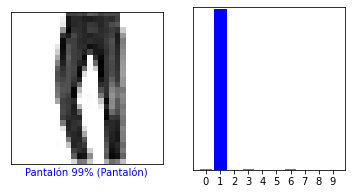

In [50]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Ahora dibujaremos la predicción de 10 imágenes

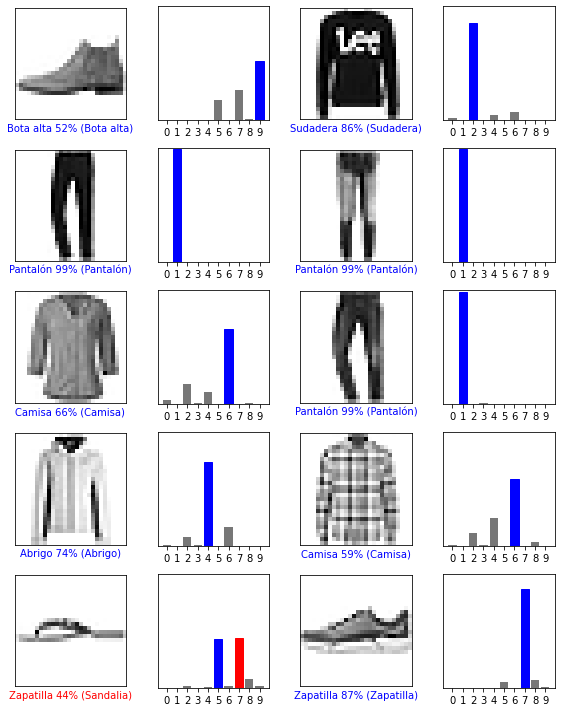

In [51]:
num_rows = 5
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

####**Caso 5**

In [52]:
# Añadimos una primera capa .Flatten que convierte el arreglo en un arreglo unidimensional,
# ademas de dos capas .Dense densamente conectadas que contienen sus nodos correspondientes.
model5 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [53]:
# Añadimos la función de pérdida y el optimizador
model5.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [54]:
# Comenzamos con el entrenamiento del modelo
model5.fit(train_images, train_labels, epochs=5, batch_size=128)
# Si observamos nuestro modelo de entrenamiento vemos que la función de pérdida
# es alta (0.5131) y que la precisión es adecuada (0.8293)

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 1.0210 - accuracy: 0.6956
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.6574 - accuracy: 0.7899
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.5808 - accuracy: 0.8111
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.5400 - accuracy: 0.8223
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.5131 - accuracy: 0.8293


In [57]:
# Comparamos el rendimiento del modelo con el conjunto de imágenes
test_loss, test_acc = model5.evaluate(test_images,  test_labels, verbose=2)
# Si lo comparamos con el modelo de entrenamiento, la función de pérdida y la precisión
# son muy parecidas, por lo que no se produce sobre entrenamiento.

313/313 - 1s - loss: 0.5373 - accuracy: 0.8134


In [56]:
# Precisión del test
print('\nTest accuracy:', test_acc)


Test accuracy: 0.8133999705314636


Realizamos la predicción

In [58]:
predictions = model5.predict(test_images)
predictions[5]

array([6.5017943e-03, 9.7604525e-01, 1.4012175e-03, 3.8599987e-03,
       1.0838345e-02, 9.4653115e-06, 1.2942402e-03, 6.4415972e-06,
       3.5962556e-05, 7.2977118e-06], dtype=float32)

Dibujamos la predicción de la 6º figura

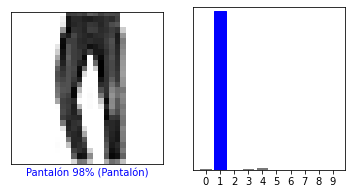

In [59]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Ahora dibujaremos la predicción de 10 imágenes

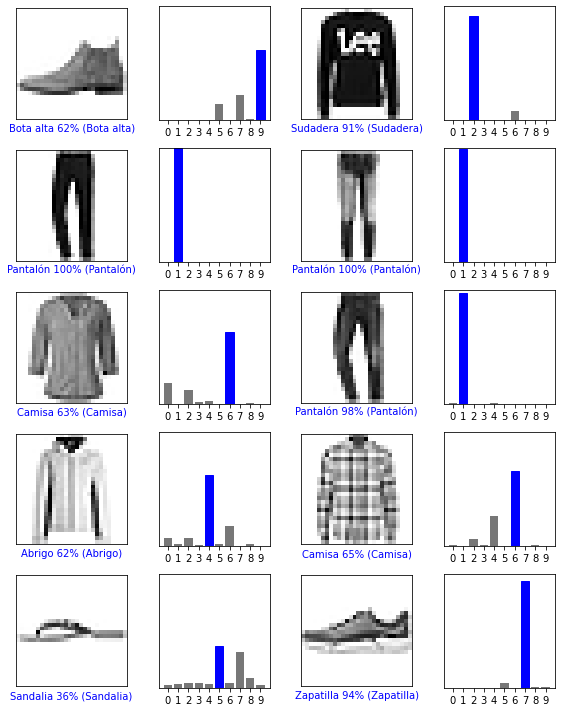

In [60]:
num_rows = 5
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

####**Caso 6**

In [61]:
# Añadimos una primera capa .Flatten que convierte el arreglo en un arreglo unidimensional,
# ademas de dos capas .Dense densamente conectadas que contienen sus nodos correspondientes.
model6 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [62]:
# Añadimos la función de pérdida y el optimizador
model6.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [63]:
# Comenzamos con el entrenamiento del modelo
model6.fit(train_images, train_labels, epochs=5, batch_size=128)
# Observamos una función de pérdida baja (0.2914) y una precisión alta (0.8927), 
# siendo hasta ahora el modelo que mejores resultados ofrece durante el entrenamiento.

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.5513 - accuracy: 0.8055
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.3802 - accuracy: 0.8607
Epoch 3/5
469/469 [==============================] - 4s 10ms/step - loss: 0.3360 - accuracy: 0.8763
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.3103 - accuracy: 0.8870
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2914 - accuracy: 0.8927


In [64]:
# Comparamos el rendimiento del modelo con el conjunto de imágenes
test_loss, test_acc = model6.evaluate(test_images,  test_labels, verbose=2)
# Si lo comparamos con el modelo de entrenamiento, la función de pérdida es mayor
# y la precisión es más baja, produciéndose lo que se conoce como sobre entrenamiento.
# Si observamos los valores de la tabla de entrenamiento, vemos que los que más se
# ajustan al modelo de prueba se producen en la época 2.

313/313 - 1s - loss: 0.3869 - accuracy: 0.8587


In [66]:
# Precisión del test
print('\nTest accuracy:', test_acc)


Test accuracy: 0.8586999773979187


Realizamos la predicción

In [67]:
predictions = model6.predict(test_images)
predictions[5]

array([3.16408341e-06, 9.99993801e-01, 1.12992161e-07, 1.16689546e-06,
       1.41119244e-06, 4.83443754e-12, 3.57105591e-07, 2.05611353e-14,
       1.12667674e-10, 1.05401892e-14], dtype=float32)

Dibujamos la predicción de la 6º figura

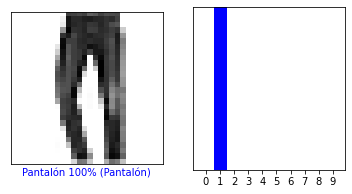

In [68]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Ahora dibujaremos la predicción de 10 imágenes

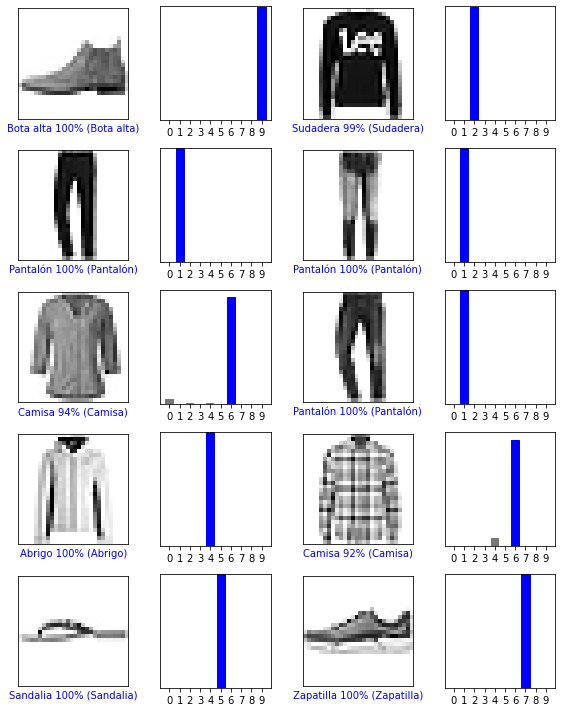

In [69]:
num_rows = 5
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

####**Caso 7**

In [70]:
# Añadimos una primera capa .Flatten que convierte el arreglo en un arreglo unidimensional,
# ademas de dos capas .Dense densamente conectadas que contienen sus nodos correspondientes.
model7 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])

In [71]:
# Añadimos la función de pérdida y el optimizador
model7.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [72]:
# Comenzamos con el entrenamiento del modelo
model7.fit(train_images, train_labels, epochs=5, batch_size=128)
# Vemos una función de pérdida alta (0.7612) y una precisión baja (0.7534)

Epoch 1/5
469/469 [==============================] - 4s 7ms/step - loss: 1.6960 - accuracy: 0.5954
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 1.1288 - accuracy: 0.7123
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.9249 - accuracy: 0.7319
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.8230 - accuracy: 0.7436
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.7612 - accuracy: 0.7534


In [74]:
# Comparamos el rendimiento del modelo con el conjunto de imágenes
test_loss, test_acc = model7.evaluate(test_images,  test_labels, verbose=2)
# Si lo comparamos con el modelo de entrenamiento, la función de pérdida y la precisión
# son muy parecidas, por lo que no se produce sobre entrenamiento.

313/313 - 1s - loss: 0.7513 - accuracy: 0.7496


In [75]:
# Precisión del test
print('\nTest accuracy:', test_acc)


Test accuracy: 0.7495999932289124


Realizamos la predicción

In [76]:
predictions = model7.predict(test_images)
predictions[5]

array([3.2749739e-02, 8.4185410e-01, 1.1114381e-02, 6.3254155e-02,
       2.2907056e-02, 6.1102578e-04, 2.6332665e-02, 2.9130137e-04,
       7.4776000e-04, 1.3781429e-04], dtype=float32)

Dibujamos la predicción de la 6º figura

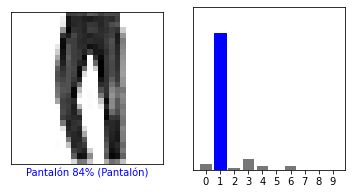

In [77]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Ahora dibujaremos la predicción de 10 imágenes

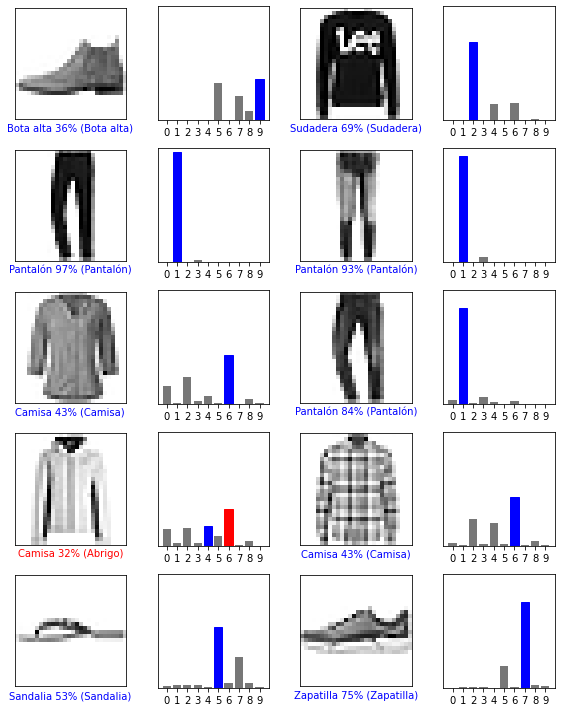

In [78]:
num_rows = 5
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

**Análisis con 25 épocas de entrenamiento**


In [79]:
# Añadimos una primera capa .Flatten que convierte el arreglo en un arreglo unidimensional,
# ademas de dos capas .Dense densamente conectadas que contienen sus nodos correspondientes.
model7 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])
# Añadimos la función de pérdida y el optimizador
model7.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Comenzamos con el entrenamiento del modelo
model7.fit(train_images, train_labels, epochs=25, batch_size=128)

Epoch 1/25
469/469 [==============================] - 4s 8ms/step - loss: 1.7113 - accuracy: 0.5868
Epoch 2/25
469/469 [==============================] - 4s 8ms/step - loss: 1.1269 - accuracy: 0.7111
Epoch 3/25
469/469 [==============================] - 3s 7ms/step - loss: 0.9202 - accuracy: 0.7318
Epoch 4/25
469/469 [==============================] - 4s 7ms/step - loss: 0.8185 - accuracy: 0.7434
Epoch 5/25
469/469 [==============================] - 4s 8ms/step - loss: 0.7580 - accuracy: 0.7533
Epoch 6/25
469/469 [==============================] - 4s 8ms/step - loss: 0.7165 - accuracy: 0.7615
Epoch 7/25
469/469 [==============================] - 3s 7ms/step - loss: 0.6860 - accuracy: 0.7680
Epoch 8/25
469/469 [==============================] - 3s 7ms/step - loss: 0.6616 - accuracy: 0.7744
Epoch 9/25
469/469 [==============================] - 4s 7ms/step - loss: 0.6421 - accuracy: 0.7798
Epoch 10/25
469/469 [==============================] - 4s 8ms/step - loss: 0.6255 - accuracy: 0.7846

In [80]:
# Comparamos el rendimiento del modelo con el conjunto de imágenes
test_loss, test_acc = model7.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.5368 - accuracy: 0.8071


Como podemos observar, el modelo con 25 épocas supone una mejoría notable a la hora de predecir una imagen en comparación con el mismo modelo pero con 5 épocas, convirtiéndose en un modelo bastante fiable.

No obstante, en este caso si que se produce un sobre entrenamiento, pero bastante leve.

####**Caso 8**

In [81]:
# Añadimos una primera capa .Flatten que convierte el arreglo en un arreglo unidimensional,
# ademas de dos capas .Dense densamente conectadas que contienen sus nodos correspondientes.
model8 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])

In [82]:
# Añadimos la función de pérdida y el optimizador
model8.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [83]:
# Comenzamos con el entrenamiento del modelo
model8.fit(train_images, train_labels, epochs=5, batch_size=128)
# Observamos una función de pérdida baja (0.3401) y una precisión alta (0.8761)

Epoch 1/5
469/469 [==============================] - 6s 12ms/step - loss: 0.5962 - accuracy: 0.7894
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.4297 - accuracy: 0.8450
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.3869 - accuracy: 0.8594
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.3606 - accuracy: 0.8683
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.3401 - accuracy: 0.8761


In [84]:
# Comparamos el rendimiento del modelo con el conjunto de imágenes
test_loss, test_acc = model8.evaluate(test_images,  test_labels, verbose=2)
# Si lo comparamos con el modelo de entrenamiento, la función de pérdida y la precisión
# son muy parecidas, por lo que no se produce sobre entrenamiento.

313/313 - 1s - loss: 0.3801 - accuracy: 0.8648


In [85]:
# Precisión del test
print('\nTest accuracy:', test_acc)


Test accuracy: 0.864799976348877


Realizamos la predicción

In [86]:
predictions = model8.predict(test_images)
predictions[5]

array([4.6511735e-03, 9.9437135e-01, 2.4373125e-04, 2.1631790e-04,
       3.7255316e-04, 1.0568241e-08, 1.3534272e-04, 8.0363299e-07,
       8.6802220e-06, 1.0551665e-08], dtype=float32)

Dibujamos la predicción de la 6º figura

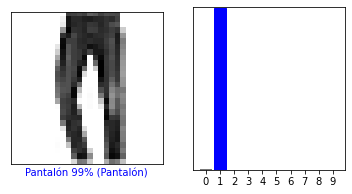

In [87]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Ahora dibujaremos la predicción de 10 imágenes

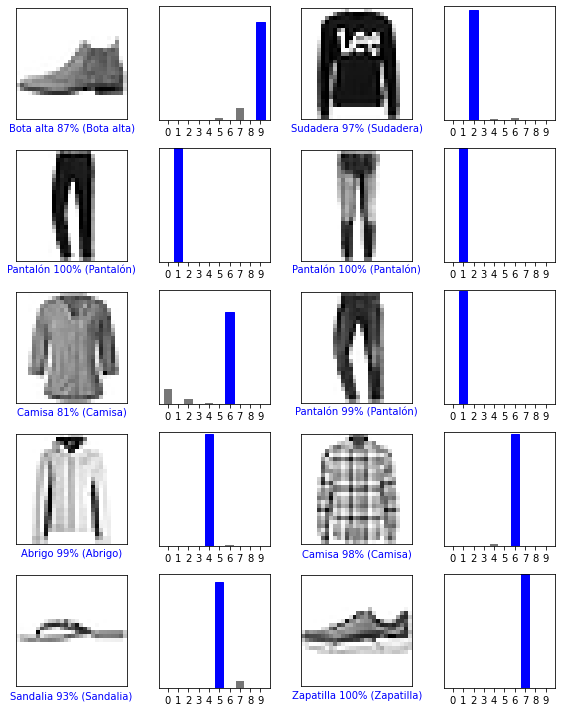

In [88]:
num_rows = 5
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()



# **Conclusión**
En conclusión, hemos aprendido el uso y funcionamiento de una red de neuronas, además de la utilidad que tienen estos modelos hoy en día. 

Hemos podido observar una mejoría a la hora de introducir más épocas de entrenamiento, cosa que a priori pensábamos que no iba a funcionar debido a un posible sobre entrenamiento. 

Además, hemos visto reflejada una mejoría en los modelos a la hora de introducir 512 neuronas en la primera capa de Dense, esto es, en los últimos 4 modelos.

Por último, hemos recopilado los resultados de los datos de entrenamiento de cada uno de los 8 modelos. 

Casos -------- Función de pérdida -------- Precisión

1 ------------------------- 0.5981 ----------------------- 0.7963

2 ------------------------- 0.4235 ----------------------- 0.8531

3 ------------------------- 1.3240 ----------------------- 0.6454

4 ------------------------- 0.5272 ----------------------- 0.8312

5 ------------------------- 0.5131 ----------------------- 0.8293

6 ------------------------- 0.2914 ----------------------- 0.8927

7 ------------------------- 0.7612 ----------------------- 0.7534

8 ------------------------- 0.3401 ----------------------- 0.8761

Como podemos observar, el mejor modelo de entrenamiento es el modelo 6, lo que supone que la mejor combinación para predecir las imágenes de los artículos de Zalando es con `512` neuronas en la capa 1, la función de activación `relu` y el optimizador `rmsprop`



# **Bibliografía**
[1] "Clasificacion Basica: Predecir una imagen de moda". En: tensorflow.org. Disponible en: 

https://www.tensorflow.org/tutorials/keras/classification?hl=es-419

[2] “Clasificación básica: Predecir una imagen de moda”. Disponible en: 

https://www.tensorflow.org/tutorials/keras/classification?hl=es-419

[3] “Optimizadores en redes neuronales profundas: un enfoque práctico”. Velasco, Luis. 26 de abril de 2020. Disponible en: 

https://velascoluis.medium.com/optimizadores-en-redes-neuronales-profundas-un-enfoque-practico-819b39a3eb5

[4] “Función de pérdida (Taguchi)- Cómo evaluar la pérdida de calidad en un producto".  Disponible en: 

https://www.pdcahome.com/funcion-de-perdida-taguchi/

[5] “What is the difference between sparse_categorical_crossentropy and categorical_crossentropy?” Disponible en: 

https://stackoverflow.com/questions/58565394/what-is-the-difference-between-sparse-categorical-crossentropy-and-categorical-c

